# Medical Insurance Charges - Practice Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing

In [3]:
df = pd.get_dummies(df, drop_first=True)

## Split Data

In [4]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Random Forest Model

In [13]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate Model

In [12]:
y_pred = model.predict(X_test)

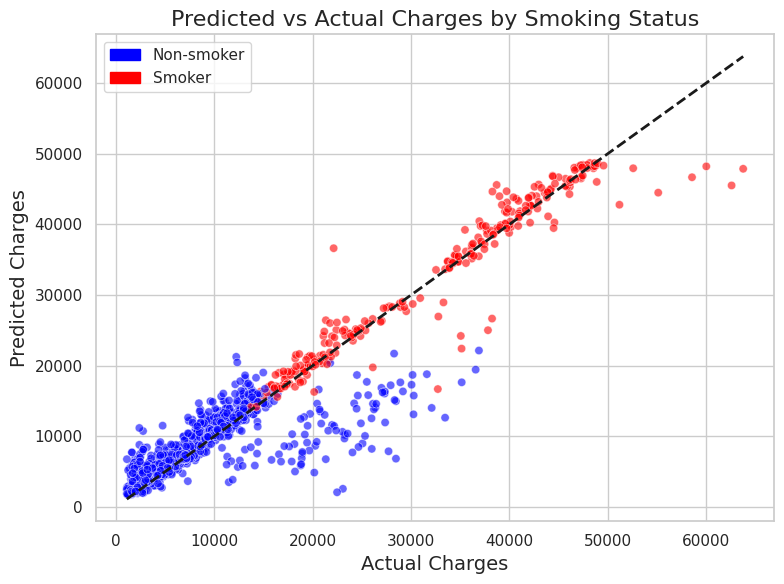

In [22]:
import matplotlib.pyplot as plt

# Predict charges using the precise Random Forest model (or your existing one)
predicted_charges = rf_precise.predict(df[['age', 'bmi', 'smoker']])

plt.figure(figsize=(8,6))

# Colors: 0 = non-smoker (blue), 1 = smoker (red)
colors = df['smoker'].map({0:'blue', 1:'red'})

# Scatter plot with transparency
plt.scatter(df['charges'], predicted_charges, c=colors, alpha=0.6, edgecolors='w', linewidth=0.5)

plt.plot([df['charges'].min(), df['charges'].max()],
         [df['charges'].min(), df['charges'].max()],
         'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)
plt.title('Predicted vs Actual Charges by Smoking Status', fontsize=16)

# Legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Non-smoker')
red_patch = mpatches.Patch(color='red', label='Smoker')
plt.legend(handles=[blue_patch, red_patch])

plt.grid(True)
plt.tight_layout()
plt.show()



## Feature Importance

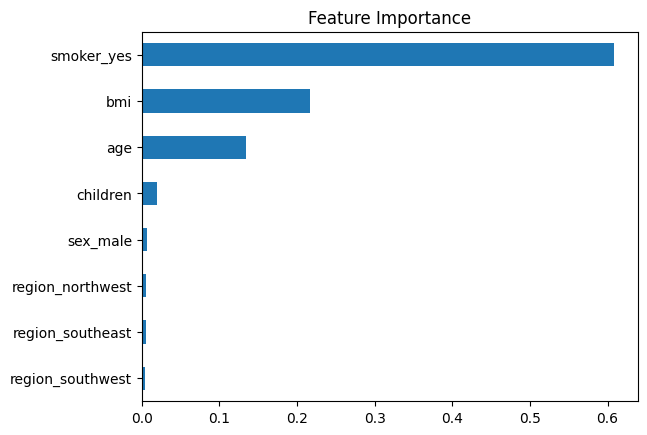

In [7]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create a more precise Random Forest Regressor
rf_precise = RandomForestRegressor(
    n_estimators=500,      # More trees for better averaging
    max_depth=10,          # Limit depth to prevent overfitting
    min_samples_leaf=3,    # Each leaf must have at least 3 samples
    random_state=42,
    n_jobs=-1              # Use all CPU cores for faster training
)

# Train the improved model
rf_precise.fit(X_train, y_train)

# Predict on the test set
y_pred_precise = rf_precise.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_precise)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_precise))
r2 = r2_score(y_test, y_pred_precise)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 3))


Mean Absolute Error (MAE): 2669.34
Root Mean Squared Error (RMSE): 4686.94
R² Score: 0.859


Mean Absolute Error: 2755.56
Root Mean Squared Error: 5066.37
R² Score: 0.83
